In [5]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [8]:
gen = ImageDataGenerator(rotation_range=20, shear_range=0.2, width_shift_range=0.2, 
                        height_shift_range=0.2, horizontal_flip=True)

# train data의 개수(50000)의 1.5배만큼 랜덤한 데이터를 생성
augment_ratio = 1.5 
augment_size = int(augment_ratio * X_train.shape[0])
randidx = np.random.randint(X_train.shape[0], size=augment_size)

In [9]:
X_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()

X_augmented, y_augmented = gen.flow(X_augmented, y_augmented, batch_size=augment_size, shuffle=False).next()

X_train = np.concatenate((X_train, X_augmented))
y_train = np.concatenate((y_train, y_augmented))

s = np.arange(X_train.shape[0])
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

In [26]:
cnn=Sequential()

cnn.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3))) # 3x3필터 32개 
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same')) 
cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu', padding='same')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(256,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [29]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

hist = cnn.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
489/489 [==============================] - 427s 869ms/step - loss: 0.4835 - accuracy: 0.8363 - val_loss: 0.4388 - val_accuracy: 0.8579
Epoch 2/50
489/489 [==============================] - 426s 872ms/step - loss: 0.4780 - accuracy: 0.8386 - val_loss: 0.4496 - val_accuracy: 0.8514
Epoch 3/50
489/489 [==============================] - 417s 853ms/step - loss: 0.4789 - accuracy: 0.8378 - val_loss: 0.4375 - val_accuracy: 0.8568
Epoch 4/50
489/489 [==============================] - 412s 843ms/step - loss: 0.4760 - accuracy: 0.8392 - val_loss: 0.4216 - val_accuracy: 0.8583
Epoch 5/50
489/489 [==============================] - 23423s 48s/step - loss: 0.4757 - accuracy: 0.8398 - val_loss: 0.4214 - val_accuracy: 0.8646
Epoch 6/50
489/489 [==============================] - 424s 867ms/step - loss: 0.4723 - accuracy: 0.8405 - val_loss: 0.4464 - val_accuracy: 0.8602
Epoch 7/50
489/489 [==============================] - 416s 850ms/step - loss: 0.4734 - accuracy: 0.8404 - val_loss: 0.4457 -

In [30]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.4649 - accuracy: 0.8584


[0.46491748094558716, 0.8583999872207642]

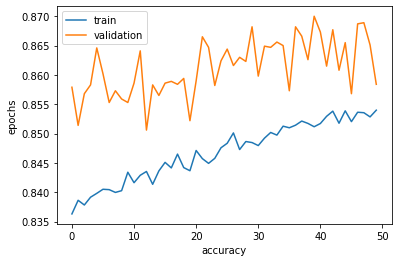

In [31]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')

plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend()

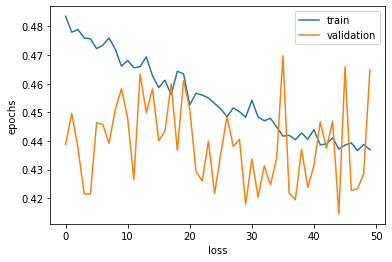

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')

plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()